In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [24]:
# Read Hpv data
file_address = '../Data/NassauCountyHPV.csv'

df_hpv_nassau = pd.read_csv(file_address)

file_address = '../Data/SuffolkCountyHPV.csv'

df_hpv_suffolk = pd.read_csv(file_address)

# Read TDAP data
file_address = '../Data/NassauCountyTDAP.csv'

df_tdap_nassau = pd.read_csv(file_address)

file_address = '../Data/SuffolkCountyTDAP.csv'

df_tdap_suffolk = pd.read_csv(file_address)


file_address = '../Data/longislandzip.csv'

df_zipcode = pd.read_csv(file_address)

In [15]:
file_address = '../Data/Ageout_hpv.csv'

df_age_hpv = pd.read_csv(file_address)


file_address = '../Data/Ageout_total.csv'

df_age_total = pd.read_csv(file_address)

In [25]:
# Clean Data , drop N/A zipcode
df_hpv_nassau.dropna(subset=['PatientZip'], inplace=True)
df_hpv_suffolk.dropna(subset=['PatientZip'], inplace=True)
df_tdap_nassau.dropna(subset=['PatientZip'], inplace=True)
df_tdap_suffolk.dropna(subset=['PatientZip'], inplace=True)


zips = np.array(df_zipcode['zip'])
# Clean Data, drop zipcode not on the Long Island
df_hpv_nassau = df_hpv_nassau[df_hpv_nassau['PatientZip'].isin(zips)]
df_hpv_suffolk = df_hpv_suffolk[df_hpv_suffolk['PatientZip'].isin(zips)]
df_tdap_nassau = df_tdap_nassau[df_tdap_nassau['PatientZip'].isin(zips)]
df_tdap_suffolk = df_tdap_suffolk[df_tdap_suffolk['PatientZip'].isin(zips)]

df_tdap = pd.concat([df_tdap_nassau,df_tdap_suffolk])

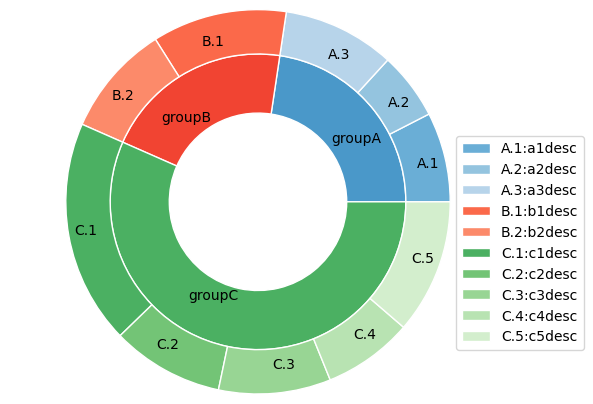

In [13]:


# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 
'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3-0.3, labels=group_names, labeldistance=0.65,colors= 
[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.4, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3, 
labels=subgroup_names, labeldistance=0.85, colors=[a(0.5), a(0.4), 
a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.3, edgecolor='white')
plt.margins(0,0)

plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[3:], subgroup_names_legs, loc=(0.9, 0.1))
plt.show()


## TASK 1:  Split the dataset into 3 parts.   
1. No hpv vaccine.   
2. first dose before <15.   
3. first dose after >= 15   
### Those populations are based on all the patients from the whole datasets no matther which years.

In [23]:
has_empty=df_age_total['2021'].isna().any()
print('total populations until 2021 is',len(df_age_total),',has nan?',has_empty)

total populations until 2021 is 888277 ,has nan? False


In [26]:
df_hpv = pd.concat([df_hpv_nassau,df_hpv_suffolk])

In [28]:
# df_tdap = df_tdap.sort_values(by='vax_year',ascending=True)
df_hpv = df_hpv.sort_values(by='vax_year',ascending=True)
# df=df.sort_values(by='vax_year',ascending=True)
df_hpv_distinct = df_hpv.drop_duplicates(subset = ['client_id'],keep='first')

In [30]:
print(len(df_hpv_distinct),len(df_hpv))

410778 856446


In [31]:
df_hpv_distinct

,client_id,vax_month,vax_year,RACE_DESC,ETHNICITY_DESC,PatientAge,Trade_name,PatientZip,PatientCounty,ProviderCounty,GENDER
141766,4399655,2,2008,WHITE,HISPANIC OR LATINO,13,Unspecified,11772.0,Suffolk,Suffolk,F
178342,4960005,7,2008,UNKNOWN,UNKNOWN,16,Gardasil,11968.0,Suffolk,Westchester,F
178343,4960058,2,2008,WHITE,NOT HISPANIC OR LATINO,18,Gardasil,11743.0,Suffolk,Westchester,F
9140,1941668,1,2008,UNKNOWN,UNKNOWN,16,Gardasil,11040.0,Nassau,Nassau,F
195533,5413086,3,2008,UNKNOWN,NOT HISPANIC OR LATINO,13,Unspecified,11710.0,Nassau,Nassau,F
...,...,...,...,...,...,...,...,...,...,...,...
230374,5642699,4,2021,WHITE,NOT HISPANIC OR LATINO,11,Gardasil 9,11958.0,Suffolk,Suffolk,M
230366,5641535,3,2021,UNKNOWN,HISPANIC OR LATINO,11,Gardasil 9,11746.0,Suffolk,Suffolk,M
230365,5641533,3,2021,ASIAN,UNKNOWN,11,Gardasil 9,11757.0,Suffolk,Suffolk,M
255822,6084289,6,2021,WHITE,NOT HISPANIC OR LATINO,25,Gardasil 9,11730.0,Suffolk,New York,M


In [41]:
df_filter_hpv= df_hpv_distinct[df_hpv_distinct['PatientAge']<15]


In [42]:
print('The number of populations received first hpv dose after Age 15:',len(df_hpv_distinct) - len(df_filter_hpv))
print('The number of populations received first hpv dose before Age 15:',len(df_filter_hpv))
print('The number of populations didn\'t receive hpv dose:',len(df_age_total) - len(df_hpv_distinct))

The number of populations received first hpv dose after Age 15: 140597
The number of populations received first hpv dose before Age 15: 270181
The number of populations didn't receive hpv dose: 477499


Text(0.5, 1.0, 'Distribution of Hpv First dose Age')

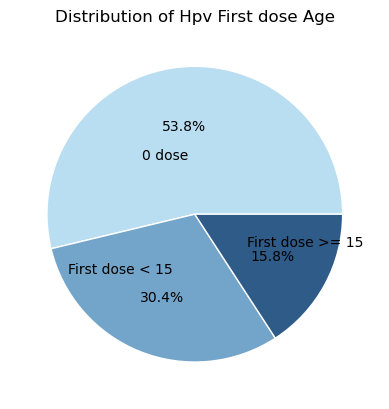

In [89]:
# 11-13 age group
labels = ["0 dose", "First dose < 15", "First dose >= 15"]
value = [len(df_age_total) - len(df_hpv_distinct),len(df_filter_hpv),len(df_hpv_distinct) - len(df_filter_hpv)]
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.4,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Hpv First dose Age')
# plt.show() 

## TASK 2: See the Distribution of Completeness in each Age Group  
1. The age group is divided to < 15 and >= 15 groups  
2. We can tell how many kids receive the complete serious of hpv vaccine

In [47]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']<15)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')
group

,count,c
0,1,49312
1,2,163025
2,3,57844


[49312, 163025, 57844]


Text(0.5, 1.0, 'Distribution of Age < 15 kids Hpv Vaccine Completeness')

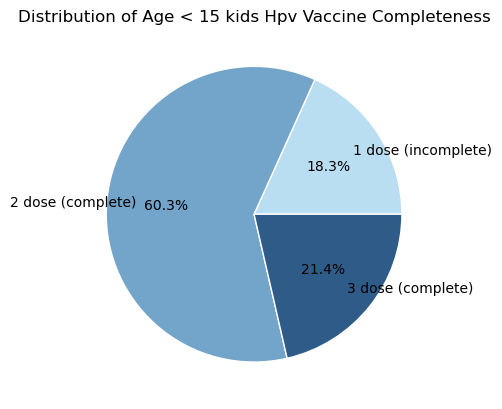

In [74]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']<15)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')
# group



labels = ["1 dose (incomplete)", "2 dose (complete)", "3 dose (complete)"]
value = list(group['c'])
print(value)
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.8,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Age < 15 kids Hpv Vaccine Completeness')
# plt.show() 

[38598, 37043, 64956]


Text(0.5, 1.0, 'Distribution of Age >= 15 populations Hpv Vaccine Completeness')

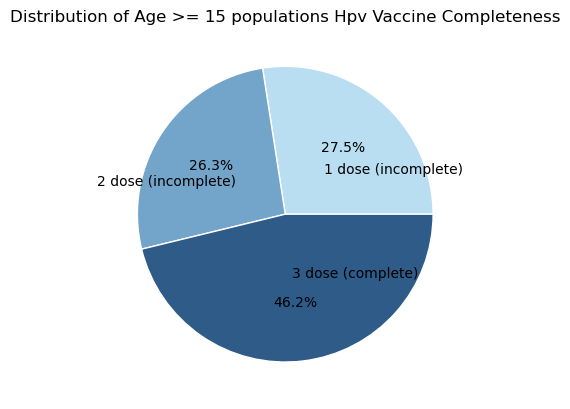

In [75]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']>=15)]['client_id'])
clients = set(clients)

qual_patients_records = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

group = grouped.groupby(['count']).size().reset_index(name='c')



labels = ["1 dose (incomplete)", "2 dose (incomplete)", "3 dose (complete)"]
value = list(group['c'])
print(value)
colors = ["#B9DDF1", "#73A4CA", "#2E5B88"]

# Pie chart
fig, ax = plt.subplots()
ax.pie(value, labels = labels, colors = colors,autopct='%1.1f%%', labeldistance=0.4,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.title('Distribution of Age >= 15 populations Hpv Vaccine Completeness')
# plt.show() 

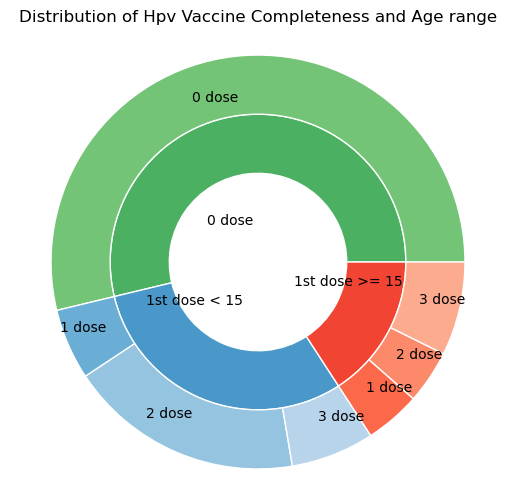

In [97]:


# Make data: I have 3 groups and 7 subgroups
group_names=["0 dose", "1st dose < 15", "1st dose >= 15"]
group_size=[477499, 270181, 140597]
subgroup_names=['0 dose','1 dose', '2 dose', '3 dose', '1 dose', '2 dose', '3 dose']
subgroup_size=[477499,49312, 163025, 57844,38598, 37043, 64956]

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# First Ring (inside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.4-0.4, labels=group_names, labeldistance=0.28,colors= 
[c(0.6), a(0.6), b(0.6)] )
plt.setp( mypie, width=0.4, edgecolor='white')

# Second Ring (outside)
mypie2, _ = ax.pie(subgroup_size, radius=1.4, 
labels=subgroup_names, labeldistance=0.8, colors=[c(0.5),a(0.5), a(0.4), 
a(0.3), b(0.5), b(0.4), b(0.3)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

# plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

plt.title('Distribution of Hpv Vaccine Completeness and Age range',pad=40)
# plt.subplots_adjust(top=0.9) 

# ax.legend(handles[3:], subgroup_names_legs, loc=(0.9, 0.1))
plt.show()


## TASK3 Analysis the gap between each dose.

In [102]:
clients = np.array(df_hpv_distinct[(df_hpv_distinct['PatientAge']<15)]['client_id'])
clients = set(clients)

patients_u14 = df_hpv[df_hpv['client_id'].isin(clients)]

grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

# group = grouped.groupby(['count']).size().reset_index(name='c')

In [105]:
grouped = qual_patients_records.groupby(['client_id']).size().reset_index(name='count')

In [106]:
def SplitClientsByNumberOfDose(patients):
    lst_of_df = []
    grouped = patients.groupby(['client_id']).size().reset_index(name='count')
    print(grouped['count'].unique())
    numbers = list(grouped['count'].unique())
    lst_of_df.append(numbers)
    for number in numbers:
        clients = np.array(grouped[grouped['count']==number]['client_id'])
        clients = set(clients)
        lst_of_df.append(patients[patients['client_id'].isin(clients)])
    return lst_of_df


In [109]:
res = SplitClientsByNumberOfDose(patients_u14)

[3 2 1]


4